In [266]:
import time
import torch
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from tqdm.notebook import trange, tqdm
import torch.optim as optim
from CNN import *
from helper import *

%matplotlib widget

In [267]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# hyper parameter
num_epochs = 5
batch_size = 256 #75750 is divisible by 125
learning_rate = 0.001
print_frequency = 100

In [268]:
root_path = "../Data/Food101"

# the sameple data set to show sample img in case we want to convert the train and test dataset to gray scale or nomalize
sample_dataset = torchvision.datasets.Food101(root_path, download=True, 
                transform=transforms.Compose([transforms.ToTensor(), transforms.Resize((32,32))]))
sample_loader = torch.utils.data.DataLoader(sample_dataset, batch_size=batch_size)

transform = transforms.Compose([
    transforms.Resize((32, 32)), # MUST resize image so that they are the same size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    #transforms.Grayscale(),
    #torch.flatten # flatten to have vector of size 64*64 = 4096
])
train_dataset = torchvision.datasets.Food101(root_path, download=True, split='train', transform = transform)
test_dataset = torchvision.datasets.Food101(root_path, download=True, split='test', transform = transform)
print("len of train dataset: ", len(train_dataset))
print("len of test dataset: ", len(test_dataset))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

len of train dataset:  75750
len of test dataset:  25250


In [269]:
# Get the size of the input tensor
# Get a single batch of data from the data loader
# batch = next(iter(sample_loader))
batch = next(iter(sample_loader))

# Inspect the shape of the batch of images
# batch_size, channel, height, width
print(batch[0].shape)

# assume we know the number of label is 101

/Users/kietpha/opt/anaconda3/envs/cse4310/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([256, 3, 32, 32])


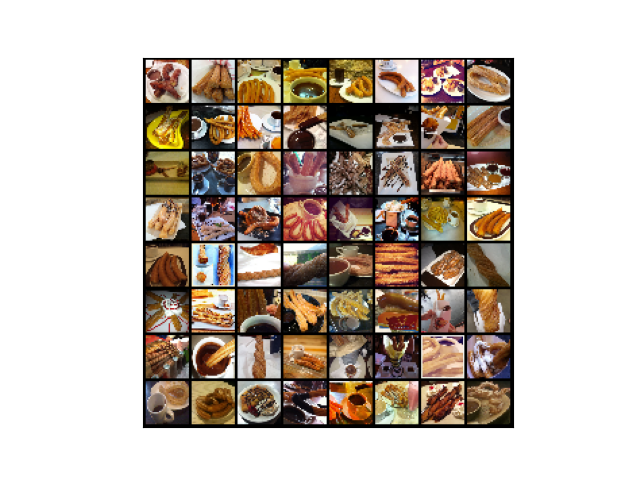

In [270]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = transforms.functional.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

samples = []

for i in range(64):
    samples.append(sample_dataset[i][0])
grid = torchvision.utils.make_grid(samples)
show(grid)
# the purpose of this is just to show some sample imgs

In [271]:
# Define your CNN model
basic_CNN_model = BasicCNN().to(device)

# choice for loss function and optimize
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(basic_CNN_model.parameters(), lr=learning_rate)
print(basic_CNN_model)

NameError: name 'BasicCNN' is not defined

In [ ]:
# trainning loop
for t in range(num_epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(basic_CNN_model, train_loader, loss_fn, optimizer, t+1)
    test(basic_CNN_model, test_loader, loss_fn)
print("Done!")

Epoch 1
-------------------------------


  0%|          | 0/296 [00:00<?, ?it/s]

IndexError: Target 91 is out of bounds.